Init 
Name : sparse_gp
Objective : 422.6710734608663
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  sparse_gp.               |   value  |  constraints  |  priors
  inducing_inputs          |  (5, 1)  |               |        
  rbf.variance             |     1.0  |      +ve      |        
  rbf.lengthscale          |     1.0  |      +ve      |        
  Gaussian_noise.variance  |     1.0  |      +ve      |         

Optimized 
Name : sparse_gp
Objective : -620.5446953538267
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  sparse_gp.               |             value  |  constraints  |  priors
  inducing_inputs          |            (5, 1)  |               |        
  rbf.variance             |     1.25994465574  |      +ve      |        
  rbf.lengthscale          |     2.46831257587  |      +ve      |        
  Gaussian_noise.variance  |  0.00230180104557  |      +ve      |         

Unconstrained 

 /Users/tomdr/VirtualEnvs/gpml/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


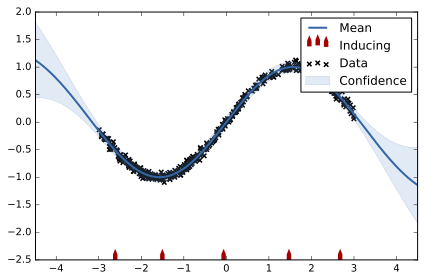

In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import GPy

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# matplotlib.rcParams['figure.figsize'] = (8,6)
m = GPy.examples.regression.sparse_GP_regression_1D(plot=False, optimize=False)
print("Init", m, '\n')
m.optimize()
print("Optimized", m, '\n')
m.unconstrain()
print("Unconstrained", m, '\n')
m.plot()

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


Optimization restart 1/10, f = -20.16534935011388
Optimization restart 2/10, f = -20.165349350107505
Optimization restart 3/10, f = -20.165349350112276
Optimization restart 4/10, f = -20.165349350112802
Optimization restart 5/10, f = -20.165349349600646
Optimization restart 6/10, f = -20.165349350103728
Optimization restart 7/10, f = -20.165349349314297
Optimization restart 8/10, f = -20.16534935010324
Optimization restart 9/10, f = -20.16534935011717
Optimization restart 10/10, f = -20.165349350117026


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


GP_regression.,value,constraints,priors
rbf.variance,0.639569300912,+ve,
rbf.lengthscale,1.43817050822,+ve,
Gaussian_noise.variance,0.0012183314953,+ve,


 /Users/tomdr/VirtualEnvs/gpml/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


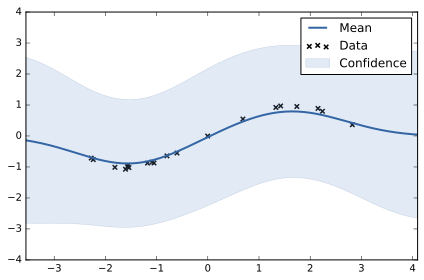

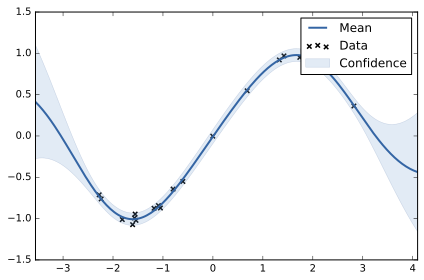

In [12]:
import GPy
import numpy as np
from IPython.display import display
%matplotlib inline
# GPy.plotting.change_plotting_library('plotly')

X = np.random.uniform(-3.,3.,(20,1))
Y = np.sin(X) + np.random.randn(20,1) * 0.05
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
m = GPy.models.GPRegression(X, Y, kernel)
display(m)
m.plot()

m.optimize(messages=True)
m.optimize_restarts(num_restarts=10)
display(m)
m.plot()

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
 /Users/tomdr/VirtualEnvs/gpml/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


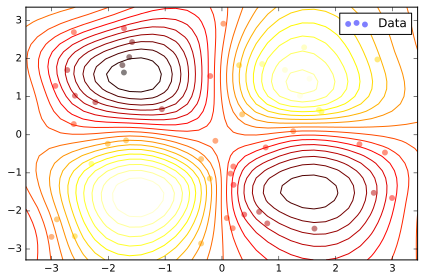

GP_regression.,value,constraints,priors
sum.Mat52.variance,0.325438199969,+ve,
sum.Mat52.lengthscale,"(2,)",+ve,
sum.white.variance,0.000418321143138,+ve,
Gaussian_noise.variance,0.000418321143138,+ve,


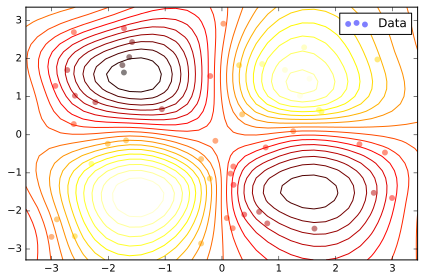

In [14]:
# sample inputs and outputs
X = np.random.uniform(-3.,3.,(50,2))
Y = np.sin(X[:,0:1]) * np.sin(X[:,1:2])+np.random.randn(50,1)*0.05

# define kernel
ker = GPy.kern.Matern52(2,ARD=True) + GPy.kern.White(2)

# create simple GP model
m = GPy.models.GPRegression(X,Y,ker)

# optimize and plot
m.optimize(messages=True,max_f_eval = 1000)
fig = m.plot()
display(GPy.plotting.show(fig))
display(m)